In [1]:
#IMBALANCED DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_churn.csv')

In [4]:
#1 Load the dataset and explore the variables.
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Get information about the dataset, including column types and non-null counts
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


None

In [6]:
# Summary statistics of the numerical columns
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
display(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Check class distribution of the target variable
display(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df = df[['SeniorCitizen','tenure','MonthlyCharges','Churn']]
df

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,No
1,0,34,56.95,No
2,0,2,53.85,Yes
3,0,45,42.30,No
4,0,2,70.70,Yes
...,...,...,...,...
7038,0,24,84.80,No
7039,0,72,103.20,No
7040,0,11,29.60,No
7041,1,4,74.40,Yes


In [10]:
#2 We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [11]:
#3 Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
def transform_churn(x):
    if x == 'Yes':
        return 1
    else:
        return 0

df['Churn'] = list(map(transform_churn,df['Churn']))
df.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [15]:
x = df.drop(['Churn'], axis=1)
y = df['Churn']

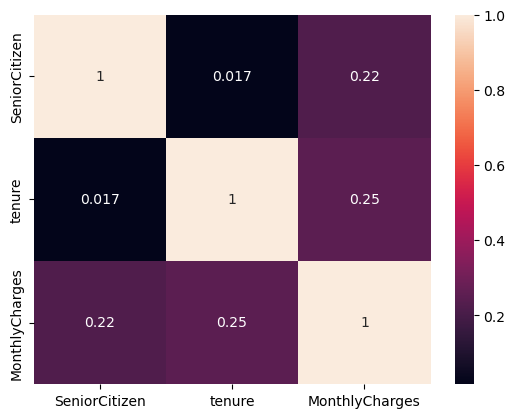

In [16]:
correlations_matrix = x.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

C:\Users\Lenovo X220 i7\AppData\Local\Temp\ipykernel_12640\2496862196.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  balance_target = pd.value_counts(df['Churn'])


<Axes: xlabel='Churn'>

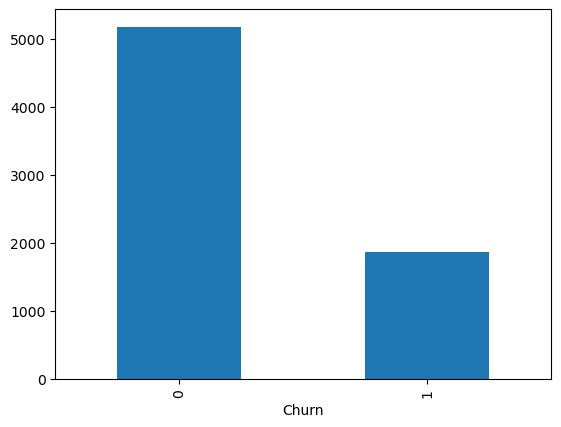

In [17]:
balance_target = pd.value_counts(df['Churn'])
balance_target.plot(kind = 'bar')

In [18]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#4 Build the logistic regression model.
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Predict on the test set
y_pred = model.predict(x_test)

In [20]:
#5 Evaluate the model.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8055358410220014
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.48      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [21]:
#6 Even a simple model will give us more than 70% accuracy. Why?
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[956,  80],
       [194, 179]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [41]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [44]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1021
           1       0.74      0.73      0.74      1049

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070



In [47]:
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
confusion_matrix(y_test,y_pred)

array([[757, 264],
       [282, 767]], dtype=int64)

In [49]:
431/(431+143)

0.7508710801393729